# Why should I bother learning python?

<img src="images/cartoon.jpeg">

### Most coding languages have advantages for specific use cases... LOLCODE does not.
<img src="images/lolcode.png" width="50%" height="50%">
<img src="images/lolcode_example.png" width="50%" height="50%">
### This lecture will be addressing the advantages of python for bioinformatics data analysis coding environments.

### Fast Development
* script language
* dynamic typing
* built in high level data types
* huge standard library
<img src="images/java.png" width="50%" height="50%"><img src="images/python.png" width="50%" height="50%">

### Very little overhead
* no compile setup - write your code in my_program.py and run it with python my_program.py
* no memory management

### Community support
* huge bioinformatics toolset of libraries built in python
* most of your questions will already be anwered on stack overflow
* most of your colleagues will code in python, so sharing code will be simplier 
* integrates well with other languages

<img src="images/community.png">

### Readability
* easy to intepret what you are doing based on code

### Drawbacks
* programs can run slower
* less flexibility


# "I would love to be able to interact with this code as Rachel talks... How can I do that?"

You're in luck! iPython (now referred to as Jupyter) has a notebook format which is easy to open and edit.

### To Open:
If you have downloaded the Anaconda distribution, you should already have jupyter notebooks at your commandline.

To check if you are using the Anaconda distribution, type the following at the command line:
```
$ which python
```

The response should be something like the following:
```
/Applications/anaconda/bin/python
```

Clone into my github repository:
```
git clone https://github.com/Rachelmarty20/bootcamp.git
```

Move into the direcory:
```
cd bootcamp
```

Next, open an ipython notebook:
```
$ ipython notebook
```
<img src="images/ipy_notebook_start.png">

Select the "Introduction to Python - Cancer Variant Classification" notebook.

### To Edit:

Double click on any cell.

### To Run:

Select Cell -> Run from menu or click triangle or learn <a href="http://johnlaudun.org/20131228-ipython-notebook-keyboard-shortcuts/">shortcuts</a>.

# Cancer Variant Classification

Cancer is caused by variations in the genome. However, patients have thousands of germline variants and hundreds of somatic mutations. 

### Can we predict which somatic mutations "drive" cancer and which are just "passengers"?

We will be working with The Cancer Genome Atlast (TCGA), which is a large cancer data set used in lots of cancer research. 

<img src="images/tcga.jpg">

## Let's start by getting the mutation calls


In [1]:
import pandas as pd

## Detour:
### pandas - library for high performance data structures and data analysis 

<img src="images/pandas_real.jpg">


(will likely become your best friend - bite the bullet and learn how to use it as soon as possible)

### Some things to know about pandas before we dive in:

* It is built on top of numpy (numerical python), which allows you to do some fancy things with numbers and sequences

In [1]:
import numpy as np
# a one dimensional array
x = np.array([2, 7, 5])
print('x:', x)

('x:', array([2, 7, 5]))


In [3]:
# a sequence starting from 4 to 12 with a step size of 3
y = np.arange(4, 12, 3)
print('y:', y)

y: [ 4  7 10]


In [4]:
# element-wise operations on arrays
print('x + y:', x + y)
print('x / y:', x / y)
print('x ^ y:', x ** y) 

x + y: [ 6 14 15]
x / y: [0 1 0]
x ^ y: [     16  823543 9765625]


* it also integrates well with scipy (scientific python), which will be your best resource for any complex statistics
* let's also just introduce matplotlib while we are at it - pyplot is one of the most popular plotting tools in python

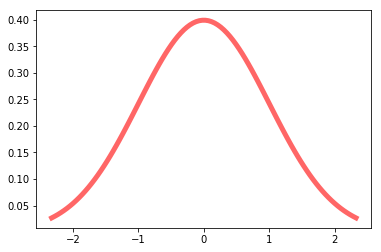

In [5]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')

## Now back to downloading our cancer variants. Let's use pandas to get them into a dataframe. <BR>
   I have already downloaded a metadata file for you from the TCGA data portal: https://portal.gdc.cancer.gov/ <br>
    This metadata file allows us to download somatic variant files directly from our notebook.

In [6]:
metadata = pd.read_csv('./gdc_manifest.2018-08-09.txt', sep='\t')

In [7]:
metadata.head()

,id,filename,md5,size,state
0,6f6a4290-b6be-49f5-be45-97d742957a9e,TCGA.TGCT.mutect.6f6a4290-b6be-49f5-be45-97d74...,d8b754219bc992b2736bb17109a7f872,876679,submitted
1,1aa33f25-3893-4f37-a6a4-361c9785d07e,TCGA.HNSC.mutect.1aa33f25-3893-4f37-a6a4-361c9...,03eec1f744c029418969a213d8ccc548,25886548,submitted
2,c06465a3-50e7-46f7-b2dd-7bd654ca206b,TCGA.STAD.mutect.c06465a3-50e7-46f7-b2dd-7bd65...,e0462a747a83d3f09abb28b83c1b634e,54560201,submitted
3,4b7a5729-b83e-4837-9b61-a6002dce1c0a,TCGA.SKCM.mutect.4b7a5729-b83e-4837-9b61-a6002...,e53f990f232210590c9a3624304e2bcf,89383976,submitted
4,995c0111-d90b-4140-bee7-3845436c3b42,TCGA.BRCA.mutect.995c0111-d90b-4140-bee7-38454...,4a00a1c3611c2ddcb2eed684c451eea7,31058116,submitted


#### Some handy libraries: <br>
* Requests - HTTP library
* JSON - allows for the easy reading and writing of JSON files
* re - regular expression reader

In [8]:
import requests
import json
import re

#### Note: we are only downloading one of the variant files for the sake of this lecture because it takes a while to download all of them

In [12]:
file_id = metadata.loc[5, 'id']

data_endpt = "https://api.gdc.cancer.gov/data/{}".format(file_id)

response = requests.get(data_endpt, headers = {"Content-Type": "application/json"})

# The file name can be found in the header within the Content-Disposition key.
response_head_cd = response.headers["Content-Disposition"]

file_name = "data/" + re.findall("filename=(.+)", response_head_cd)[0]

print(file_name)
with open(file_name, "wb") as output_file:
    output_file.write(response.content)

data/TCGA.READ.mutect.faa5f62a-2731-4867-a264-0e85b7074e87.DR-10.0.somatic.maf.gz


#### '!' allows you to write bash directly to the command line;  python variables can be used with the '$' symbol or placed in { }

In [13]:
! gunzip {file_name}

In [15]:
maf_df = pd.read_csv(file_name[:-3], sep='\t', header=0, skiprows= 4, comment='#')
maf_df.head()

/Users/rachel/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (87,98,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,C1orf94,84970,BCM,GRCh38,chr1,34218878,34218878,+,3'UTR,SNP,...,PASS,GGTCACAGACA,a6945d7d-472c-4da7-a122-de6d014564e9,12f0b883-900e-41b4-bbdf-a66b96e825ca,8d36e3fc-bd2c-441d-a4e1-ed7c94d2cb3e,e6827400-0d95-46b0-8874-6ce9e9d5011b,wga_pair,NaN,True,Unknown
1,MACF1,23499,BCM,GRCh38,chr1,39357837,39357837,+,Missense_Mutation,SNP,...,PASS,GAAACTTAGTA,a6945d7d-472c-4da7-a122-de6d014564e9,12f0b883-900e-41b4-bbdf-a66b96e825ca,8d36e3fc-bd2c-441d-a4e1-ed7c94d2cb3e,e6827400-0d95-46b0-8874-6ce9e9d5011b,wga_pair,COSM288283;COSM288284,True,Unknown
2,GBP5,115362,BCM,GRCh38,chr1,89260749,89260749,+,Silent,SNP,...,PASS,TGGGCGTGCTG,a6945d7d-472c-4da7-a122-de6d014564e9,12f0b883-900e-41b4-bbdf-a66b96e825ca,8d36e3fc-bd2c-441d-a4e1-ed7c94d2cb3e,e6827400-0d95-46b0-8874-6ce9e9d5011b,wga_pair,COSM288277,True,Unknown
3,ZNF326,284695,BCM,GRCh38,chr1,90007501,90007501,+,Silent,SNP,...,PASS,TCTTTCGGAGG,a6945d7d-472c-4da7-a122-de6d014564e9,12f0b883-900e-41b4-bbdf-a66b96e825ca,8d36e3fc-bd2c-441d-a4e1-ed7c94d2cb3e,e6827400-0d95-46b0-8874-6ce9e9d5011b,wga_pair,COSM288313,True,Unknown
4,BRDT,676,BCM,GRCh38,chr1,91977358,91977358,+,Missense_Mutation,SNP,...,PASS,ATGACGTTGTC,a6945d7d-472c-4da7-a122-de6d014564e9,12f0b883-900e-41b4-bbdf-a66b96e825ca,8d36e3fc-bd2c-441d-a4e1-ed7c94d2cb3e,e6827400-0d95-46b0-8874-6ce9e9d5011b,wga_pair,COSM171492,True,Unknown


In [16]:
list(maf_df.columns)

['Hugo_Symbol',
 'Entrez_Gene_Id',
 'Center',
 'NCBI_Build',
 'Chromosome',
 'Start_Position',
 'End_Position',
 'Strand',
 'Variant_Classification',
 'Variant_Type',
 'Reference_Allele',
 'Tumor_Seq_Allele1',
 'Tumor_Seq_Allele2',
 'dbSNP_RS',
 'dbSNP_Val_Status',
 'Tumor_Sample_Barcode',
 'Matched_Norm_Sample_Barcode',
 'Match_Norm_Seq_Allele1',
 'Match_Norm_Seq_Allele2',
 'Tumor_Validation_Allele1',
 'Tumor_Validation_Allele2',
 'Match_Norm_Validation_Allele1',
 'Match_Norm_Validation_Allele2',
 'Verification_Status',
 'Validation_Status',
 'Mutation_Status',
 'Sequencing_Phase',
 'Sequence_Source',
 'Validation_Method',
 'Score',
 'BAM_File',
 'Sequencer',
 'Tumor_Sample_UUID',
 'Matched_Norm_Sample_UUID',
 'HGVSc',
 'HGVSp',
 'HGVSp_Short',
 'Transcript_ID',
 'Exon_Number',
 't_depth',
 't_ref_count',
 't_alt_count',
 'n_depth',
 'n_ref_count',
 'n_alt_count',
 'all_effects',
 'Allele',
 'Gene',
 'Feature',
 'Feature_type',
 'One_Consequence',
 'Consequence',
 'cDNA_position',
 'C

#### Now we have all of our somatic mutations.

#### Let's restrict the number of columns to those useful to us. This will make the dataframe more managable (and aestheically pleasing).

In [17]:
maf_df2 = maf_df.loc[:, ['Hugo_Symbol', 'Chromosome', 'Start_Position', 
         'End_Position', 'Strand', 'Reference_Allele', 
         'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2',
         'Tumor_Sample_Barcode', 'Entrez_Gene_Id',
         'Variant_Classification','Variant_Type']]
maf_df2.head()

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Strand,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Entrez_Gene_Id,Variant_Classification,Variant_Type
0,C1orf94,chr1,34218878,34218878,+,C,C,T,TCGA-AG-3727-01A-01W-0899-10,84970,3'UTR,SNP
1,MACF1,chr1,39357837,39357837,+,T,T,G,TCGA-AG-3727-01A-01W-0899-10,23499,Missense_Mutation,SNP
2,GBP5,chr1,89260749,89260749,+,G,G,A,TCGA-AG-3727-01A-01W-0899-10,115362,Silent,SNP
3,ZNF326,chr1,90007501,90007501,+,C,C,T,TCGA-AG-3727-01A-01W-0899-10,284695,Silent,SNP
4,BRDT,chr1,91977358,91977358,+,G,G,A,TCGA-AG-3727-01A-01W-0899-10,676,Missense_Mutation,SNP


#### We want to know if mutation has occured in both strands or only one. We apply a function to the pandas dataframe to get this information.

In [18]:
def check_bi_allelic(x):
    if x[0] == x[1]:
        return True
    else:
        return False
    
maf_df2.loc[:, "Both_Alleles"] = maf_df2.loc[:, ['Tumor_Seq_Allele1', 'Tumor_Seq_Allele2']].apply(check_bi_allelic, axis=1)

In [19]:
maf_df2.head()

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Strand,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Entrez_Gene_Id,Variant_Classification,Variant_Type,Both_Alleles
0,C1orf94,chr1,34218878,34218878,+,C,C,T,TCGA-AG-3727-01A-01W-0899-10,84970,3'UTR,SNP,False
1,MACF1,chr1,39357837,39357837,+,T,T,G,TCGA-AG-3727-01A-01W-0899-10,23499,Missense_Mutation,SNP,False
2,GBP5,chr1,89260749,89260749,+,G,G,A,TCGA-AG-3727-01A-01W-0899-10,115362,Silent,SNP,False
3,ZNF326,chr1,90007501,90007501,+,C,C,T,TCGA-AG-3727-01A-01W-0899-10,284695,Silent,SNP,False
4,BRDT,chr1,91977358,91977358,+,G,G,A,TCGA-AG-3727-01A-01W-0899-10,676,Missense_Mutation,SNP,False


#### Only the first 12 characters of the 'Tumor_Sample_Barcode' are relevant to the patient, so let's extract those characters.

In [20]:
maf_df2['Patient_Barcode'] = maf_df2.Tumor_Sample_Barcode.str[:12]

#### And then simplify the dataframe again...

In [21]:
maf_df3 = maf_df2.loc[:, ['Hugo_Symbol', 'Entrez_Gene_Id', 'Patient_Barcode', 
                          'Variant_Classification', 'Both_Alleles', 'Start_position']]
maf_df3 = maf_df3[maf_df3.Entrez_Gene_Id != 0]
maf_df3.head()

/Users/rachel/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Hugo_Symbol,Entrez_Gene_Id,Patient_Barcode,Variant_Classification,Both_Alleles,Start_position
0,C1orf94,84970,TCGA-AG-3727,3'UTR,False,NaN
1,MACF1,23499,TCGA-AG-3727,Missense_Mutation,False,NaN
2,GBP5,115362,TCGA-AG-3727,Silent,False,NaN
3,ZNF326,284695,TCGA-AG-3727,Silent,False,NaN
4,BRDT,676,TCGA-AG-3727,Missense_Mutation,False,NaN


## Let's explore the data a little bit!

#### How many patients are there?

In [22]:
len(maf_df3.Patient_Barcode.unique())

137

#### How many rows (mutations) are in our dataframe?

In [23]:
maf_df3.count()

Hugo_Symbol               64362
Entrez_Gene_Id            64362
Patient_Barcode           64362
Variant_Classification    64362
Both_Alleles              64362
Start_position                0
dtype: int64

#### Do we have any mutations in TP53?

In [24]:
maf_tp53 = maf_df3[maf_df3.Hugo_Symbol == 'TP53']

In [25]:
maf_tp53.head()

,Hugo_Symbol,Entrez_Gene_Id,Patient_Barcode,Variant_Classification,Both_Alleles,Start_position
194,TP53,7157,TCGA-DC-6160,Frame_Shift_Del,False,NaN
311,TP53,7157,TCGA-AG-3882,Missense_Mutation,False,NaN
581,TP53,7157,TCGA-F5-6863,Missense_Mutation,False,NaN
929,TP53,7157,TCGA-G5-6233,Frame_Shift_Ins,False,NaN
6671,TP53,7157,TCGA-EI-6917,Missense_Mutation,False,NaN


#### Next, we save the dataframe as a csv file (just for fun). How easy is that?? 

In [26]:
maf_df3.to_csv('mafs/a_maf_file.concise.csv')

#### How many mutations do each of the patients have?

##### '%matplotlib inline' is a magic function that allows you to do all of your plotting inside an ipython notebook

Text(0,0.5,'Number of Patients')

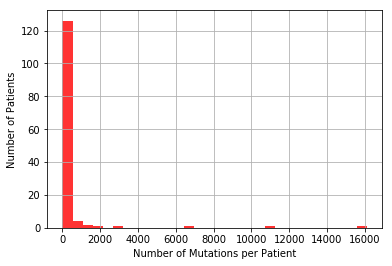

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
ax = maf_df3.Patient_Barcode.value_counts().hist(color='r', alpha=0.8, bins=30)
ax.set_xlabel("Number of Mutations per Patient")
ax.set_ylabel("Number of Patients")

#### Why is there so much variation??

According to Lawrence et al. 2013 in Nature, different cancer types have vastly different distributions of mutations.

<img src="images/nature12213-f1.2.jpg">

#### What kinds of mutations are we dealing with?

Text(0.5,0,'Type of Mutation')

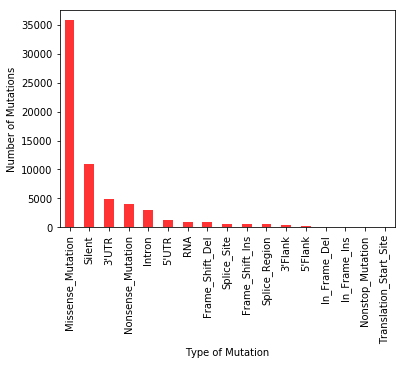

In [28]:
# make a pie chart instead? 
ax = maf_df3.Variant_Classification.value_counts().plot(kind='bar', color='r', alpha=0.8)
ax.set_ylabel("Number of Mutations")
ax.set_xlabel("Type of Mutation")

#### Which genes are most frequently mutated?

Text(0,0.5,'Number of Times Mutated')

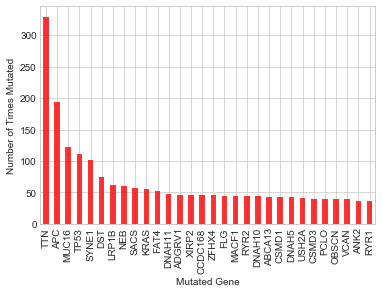

In [29]:
import seaborn as sns
sns.set_style("whitegrid")
ax = maf_df3['Hugo_Symbol'].value_counts()[:30].plot(kind='bar', color='r', alpha=0.8)
ax.set_xlabel("Mutated Gene")
ax.set_ylabel("Number of Times Mutated")

# Let's get some genetic interaction information about our genes...

#### In order to use machine learning to predict our "driver" genes, we need to create a useful feature vector. The best predicting algorithms use many features - we are going to use three fairly simple ones. One feature will be the possible disruption of a gene as measured by the number of other genes in which it interacts.

#### <a href="http://www.functionalnet.org/humannet">Human Net</a> is a probabilistic functional gene network of nearly 20,000 validated protein coding genes constructed by the integration of 21 'omics' data types.

#### Picture something like this:

<img src="images/gene_network.jpg">

#### The human net data is stored in a txt file in our folder. Let's read it. For each gene, let's create a list of its connections. 

In [30]:
edges = {}
with open('data/HumanNet.v1.join.txt', 'r') as human_net:
    for line in human_net:
        c = [x for x in line.strip().split("\t")]
        one = int(c[0])
        two = int(c[1])
        
        if one in edges:
            edges[one].append(two)
        else:
            edges[one] = [two]
        if two in edges:
            edges[two].append(one)
        else:
            edges[two] = [one]


#### Is it possible to save a dictionary? Yes! Pickle!
* Pickle can be used for any serializable object; however, it does not compress the object

In [31]:
import cPickle as pickle
pickle.dump(edges, open("pickles/edges.p", 'wb'))

#### We can load the pickle file and get the exact same object back in python.

In [32]:
import cPickle as pickle
edges = pickle.load(open("pickles/edges.p", 'rb'))

#### What does the distribution of edge numbers look like in human net?

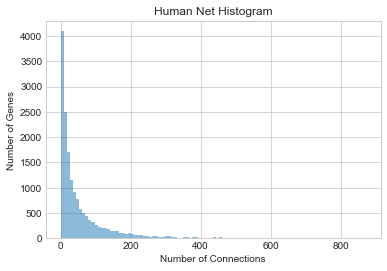

In [33]:
connect = map(len, edges.values())

n, bins, patches = plt.hist(connect, bins=100, alpha=0.5)
plt.xlabel('Number of Connections')
plt.ylabel('Number of Genes')
plt.title('Human Net Histogram')
plt.grid(True)

# Now that we have a fancy network feature, let's create a couple other simple features.

#### How often is the gene mutated in TCGA? If a gene is mutated more frequently, it could mean that there is selective pressure toward mutation.

In [34]:
mutations = pd.DataFrame(maf_df3.Entrez_Gene_Id.value_counts())
mutations = mutations.reset_index()
mutations.columns = ['Entrez_Gene_Id', 'counts']
mutations.head()

,Entrez_Gene_Id,counts
0,7273,329
1,324,194
2,94025,123
3,7157,111
4,23345,102


#### Let's also add a feature based on the percentage of time a mutation is bi-allelic. (this may be unreliable in TCGA due to mutation calling, but let's use it anyway).

In [35]:
maf_df3.head()

,Hugo_Symbol,Entrez_Gene_Id,Patient_Barcode,Variant_Classification,Both_Alleles,Start_position
0,C1orf94,84970,TCGA-AG-3727,3'UTR,False,NaN
1,MACF1,23499,TCGA-AG-3727,Missense_Mutation,False,NaN
2,GBP5,115362,TCGA-AG-3727,Silent,False,NaN
3,ZNF326,284695,TCGA-AG-3727,Silent,False,NaN
4,BRDT,676,TCGA-AG-3727,Missense_Mutation,False,NaN


In [36]:
grouped = maf_df3.groupby('Entrez_Gene_Id')
num_bi_allelic = grouped.apply(lambda g: g[g['Both_Alleles'] == False].count())['Patient_Barcode']
num_total = grouped['Patient_Barcode'].agg('count')

#### Thanks to numpy, we can divide these series by each other. Then we can add the new series to our mutations dataframe.

In [37]:
mutations['Perc_Bi_Allelic'] = pd.Series(num_bi_allelic)/pd.Series(num_total)
mutations.head()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic
0,7273,329,NaN
1,324,194,1.0
2,94025,123,1.0
3,7157,111,NaN
4,23345,102,NaN


In [38]:
mutations.to_csv('data/mutations.csv')

#### Here, we import a txt file containing a density score for each gene that can be derived from our human net analysis. We are going to spare the details because of time and just import it. 

In [39]:
densities = pd.read_csv('data/density_values.txt', sep=' ', header=None)

In [40]:
densities.columns = ["Entrez_Gene_Id", "Density"]
densities.head()

,Entrez_Gene_Id,Density
0,673,1298.9
1,2312,135.1
2,4893,1736.6
3,113146,NaN
4,94025,14.2


##### Merging pandas dataframes is quite handy (and fast)! Check out all of the ways they can be combined <a href="http://pandas.pydata.org/pandas-docs/stable/merging.html">here</a>.

In [41]:
mutations = pd.merge(mutations, densities, on='Entrez_Gene_Id', how='outer')
mutations.head()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic,Density
0,7273,329.0,NaN,1011.3
1,324,194.0,1.0,982.3
2,94025,123.0,1.0,14.2
3,7157,111.0,NaN,1549.5
4,23345,102.0,NaN,399.9


In [42]:
mutations = mutations[["Entrez_Gene_Id", "counts", "Perc_Bi_Allelic", "Density"]]
mutations.to_csv('data/tcga_feature_vector.csv')

In [43]:
mutations.dropna().head()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic,Density
1,324,194.0,1.0,982.3
2,94025,123.0,1.0,14.2
9,3845,56.0,1.0,1794.8
12,79776,46.0,1.0,143.2
16,23499,45.0,1.0,993.0


# In order to train our classifier, we need some truth data. 

#### This data was taken from the Cosmic database. It has already been formatted like our TCGA data. We have a small training and validation set for both cancer (driver) genes and neutral (passenger) genes.

In [44]:
cancer_feature_vector_training = pd.read_csv('data/cancer_feature_vector_tcga_training.csv', index_col=0)
neutral_feature_vector_training = pd.read_csv('data/neutral_feature_vector_tcga_training.csv', index_col=0)
cancer_feature_vector_validation = pd.read_csv('data/cancer_feature_vector_tcga_validation.csv', index_col=0)
neutral_feature_vector_validation = pd.read_csv('data/neutral_feature_vector_tcga_validation.csv', index_col=0)

In [45]:
cancer_feature_vector_training.head()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic,Density
0,673,480.0,0.508333,1298.9
259,4893,54.0,0.500000,1736.6
297,3265,24.0,0.541667,1824.5
918,3845,4.0,0.500000,1794.8
1020,207,4.0,0.500000,1572.9


In [46]:
import numpy as np

#### Here, we manipulate the training set to form a numpy matrix. This will be a better input format for our classifier.

In [47]:
cancer_feature_vector_training = cancer_feature_vector_training.fillna(0)
cancer_matrix = cancer_feature_vector_training.values[:,1:].astype(float)
neutral_feature_vector_training = neutral_feature_vector_training.fillna(0)
neutral_matrix = neutral_feature_vector_training.values[:,1:].astype(float)
training_matrix = np.concatenate((cancer_matrix, neutral_matrix), axis=0)
training_assignments = [1 for gene in range(len(cancer_matrix))] + [0 for gene in range(len(neutral_matrix))]

#### And we do the same thing for the validation sets.

In [48]:
cancer_feature_vector_validation = cancer_feature_vector_validation.fillna(0)
cancer_matrix = cancer_feature_vector_validation.values[:,1:].astype(float)
neutral_feature_vector_validation = neutral_feature_vector_validation.fillna(0)
neutral_matrix = neutral_feature_vector_validation.values[:,1:].astype(float)
validation_matrix = np.concatenate((cancer_matrix, neutral_matrix), axis=0)
validation_key = [1 for gene in range(len(cancer_matrix))] + [0 for gene in range(len(neutral_matrix))]

#### Let's also reformat our tcga gene data while we are at it.

In [49]:
tcga_feature_vector = mutations.copy()
tcga_feature_vector = tcga_feature_vector.dropna()
tcga_matrix = tcga_feature_vector.values[:,1:].astype(float)

#### The data looks a little bit different now.

In [50]:
print(tcga_matrix)

[[1.9400e+02 1.0000e+00 9.8230e+02]
 [1.2300e+02 1.0000e+00 1.4200e+01]
 [5.6000e+01 1.0000e+00 1.7948e+03]
 ...
 [2.0000e+00 1.0000e+00 5.6740e+02]
 [2.0000e+00 1.0000e+00 4.1350e+02]
 [2.0000e+00 1.0000e+00 7.6100e+01]]


#### Let's use a Random Forest to classify our mutated genes.

##### Scikit-learn: a library for machine learning in python

In [51]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5)
clf = clf.fit(training_matrix, training_assignments)

In [52]:
output = clf.predict(tcga_matrix)

#### We can save our classifier to be used later using scikit's joblib.

In [53]:
from sklearn.externals import joblib
save = joblib.dump(clf, 'classifiers/random_forest.pkl') 

#### This is how we would re-load it.

In [54]:
clf = joblib.load('classifiers/random_forest.pkl') 

#### Scikit-learn can tell us how confident it is...

In [55]:
confidence = clf.predict_proba(tcga_matrix)

In [56]:
print(confidence)

[[0.50090476 0.49909524]
 [0.50090476 0.49909524]
 [0.48566667 0.51433333]
 ...
 [0.50404762 0.49595238]
 [0.50404762 0.49595238]
 [0.50404762 0.49595238]]


#### Okay, so this classifier kinda sucks. Let's continue anyway.

In [57]:
print(list(output).count(0))
print(list(output).count(1))

1043
66


#### It performs pretty well on our TINY validation set though. Can anyone guess why?

In [58]:
validation_predictions = clf.predict(validation_matrix)
print(list(validation_predictions))
print(validation_key)

[1, 1, 0, 0, 0]
[1, 1, 0, 0, 0]


#### Here's some information about the driver genes and the passenger genes

In [59]:
cancer_feature_vector = pd.concat([cancer_feature_vector_training, cancer_feature_vector_validation])
cancer_feature_vector.describe()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic,Density
count,8.00000,8.000000,8.000000,8.000000
mean,5913.25000,71.375000,0.443750,1527.862500
std,7355.63323,166.122964,0.179878,280.582572
min,207.00000,1.000000,0.000000,1035.300000
25%,2617.00000,2.000000,0.500000,1320.200000
50%,4369.00000,4.000000,0.500000,1602.750000
75%,5399.50000,31.500000,0.502083,1751.150000
max,23405.00000,480.000000,0.541667,1824.500000


In [60]:
neutral_feature_vector = pd.concat([neutral_feature_vector_training, neutral_feature_vector_validation])
neutral_feature_vector.describe()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic,Density
count,9.000000,9.000000,9.0,9.000000
mean,98423.777778,2.777778,1.0,249.322222
std,143824.453413,1.922094,0.0,367.367816
min,143.000000,1.000000,1.0,0.000000
25%,2312.000000,1.000000,1.0,1.500000
50%,5545.000000,3.000000,1.0,97.700000
75%,113146.000000,4.000000,1.0,212.700000
max,388646.000000,6.000000,1.0,1030.300000


#### Density appears to be the big differentiator. Let's plot it to get a better idea.

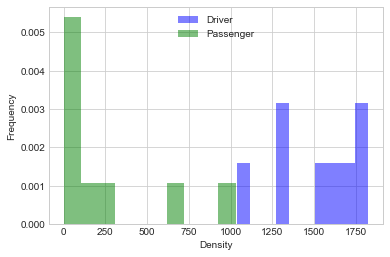

In [61]:
ax = cancer_feature_vector.Density.hist(density=True, alpha=0.5, color='b', label='Driver')
neutral_feature_vector.Density.hist(density=True, alpha=0.5, ax=ax, color='g', label='Passenger')
ax.set_xlabel("Density")
ax.set_ylabel("Frequency")
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc=9)

# This is supposed to be bioinformatics, right? Where's the biology?

#### Luckily, we can find out a little bit of information about some of our predicted genes.

In [62]:
tcga_feature_vector['output'] = pd.Series(output)
tcga_feature_vector.head()

,Entrez_Gene_Id,counts,Perc_Bi_Allelic,Density,output
1,324,194.0,1.0,982.3,0.0
2,94025,123.0,1.0,14.2,1.0
9,3845,56.0,1.0,1794.8,0.0
12,79776,46.0,1.0,143.2,0.0
16,23499,45.0,1.0,993.0,0.0


#### Let's isolate the genes that are predicted to drive cancer.

In [63]:
predicted_cancer_genes = list(tcga_feature_vector[tcga_feature_vector.output == 1].Entrez_Gene_Id)[:10]

#### We can query the NCBI entrez database directly from a python notebook to look at their functions.

##### Biopython: a library that does several useful bioinformaticsy things <br>
As far as I know, it doesn't come in the Anaconda distribution, so you may need "conda install -c anaconda biopython"

In [64]:
from Bio import Entrez
Entrez.email = "ramarty@ucsd.edu"
summaries = {}
for gene in predicted_cancer_genes:
    handle = Entrez.esummary(db="gene", id=int(gene), rettype="gb", retmode="text")
    #soup = BeautifulSoup(handle.read(), 'xml')
    record = Entrez.read(handle)
    #summaries[gene] = [str(soup.find('NomenclatureSymbol').string), str(soup.find('Summary').string)]
    break

In [65]:
record[u'DocumentSummarySet'][u'DocumentSummary'][0][u'NomenclatureSymbol']

'MUC16'

In [66]:
record[u'DocumentSummarySet'][u'DocumentSummary'][0][u'Summary']

'This gene encodes a protein that is a member of the mucin family. Mucins are high molecular weight, O-glycosylated proteins that play an important role in forming a protective mucous barrier, and are found on the apical surfaces of the epithelia. The encoded protein is a membrane-tethered mucin that contains an extracellular domain at its amino terminus, a large tandem repeat domain, and a transmembrane domain with a short cytoplasmic domain. The amino terminus is highly glycosylated, while the repeat region contains 156 amino acid repeats unit that are rich in serines, threonines, and prolines. Interspersed within the repeats are Sea urchin sperm protein Enterokinase and Agrin (SEA) modules, leucine-rich repeats and ankyrin (ANK) repeats. These regions together form the ectodomain, and there is a potential cleavage site found near an SEA module close to the transmembrane domain. This protein is thought to play a role in forming a barrier, protecting epithelial cells from pathogens. P

### Also check out these useful libraries
* cython - a python to C source code translator; could be used to speed up your code
* Rpy2 - integrate your R code with python code
* sqlite - interact with a sql database
* scikit-bio - still in beta, but has promise
* future - division, print